# Simulations (50pt)

    You will proceed as follows: first, you compute the difference between the average admission chance for students with and without research experience. Thereafter you create two samples of random normal numbers, similar to data above, using the mean and standard deviation over all students (whatever their research experience). Call one of these samples “fake researchers” and the other “fake non-researchers”. What is the difference of means of these two groups? And now you repeat this exercise many-many times and see if you can get as big a difference between the fake researchers and fake non-researchers as there is between real researchers and real non-researchers.

In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import ttest_ind

    1. (2pt) load data college-admissions.csv. You only need variables Research and Chance to Admit. You are welcome to delete all other variables right here. 
    Perform basic description of data: what is the number of observations? Are there any missings or otherwise invalid entries?

In [2]:
# Load the dataset
admission_df = pd.read_csv('/home/jovyan/PS/data/college-admissions.csv', sep=',')
# Extract the columns that are going to be used in PS
admission_df = admission_df[['Research', 'Chance of Admit ']]
# Get rid of the space after 'Admit' in the original dataframe for convenience
admission_df.rename(columns={'Chance of Admit ': 'Chance of Admit'}, inplace=True)
# Print the basic description of data
print('Number of rows:', admission_df.shape[0])
print('Number of columns:', admission_df.shape[1])
print('Number of missings or invalid entries in each column:')
print(admission_df.isna().sum())
admission_df.head(5)

Number of rows: 400
Number of columns: 2
Number of missings or invalid entries in each column:
Research           0
Chance of Admit    0
dtype: int64


,Research,Chance of Admit
0,1,0.92
1,1,0.76
2,1,0.72
3,1,0.80
4,0,0.65


    2. (3pt) Describe the admission probability: compute its mean, median, standard deviation, and range. According to these figures, which students are more likely to be admitted–researchers or non-researchers?

In [3]:
# Filter the observations by researcher and non-researcher
researcher_admit = admission_df[(admission_df.Research == 1)]
researcher_admit = researcher_admit['Chance of Admit']
non_researcher_admit = admission_df[(admission_df.Research == 0)]
non_researcher_admit = non_researcher_admit['Chance of Admit']
# Compute mean, median, standard deviation, range for reseacher admission probability
print('Researcher Admission Summary Stat:')
print('Mean of admission probability for researchers:', researcher_admit.mean())
print('Median of admission probability for researchers:', researcher_admit.median())
print('Standard deviation of admission for researchers:', researcher_admit.std())
print('Range of admission probability for researchers:', researcher_admit.max() - admission_df['Chance of Admit'].min())
# Compute mean, median, standard deviation, range for non-reseacher admission probability
print()
print('Non-Researcher Admission Summary Stat:')
print('Mean of admission probability for non-researchers:', non_researcher_admit.mean())
print('Median of admission probability for non-researchers:', non_researcher_admit.median())
print('Standard deviation of admission for non-researchers:', non_researcher_admit.std())
print('Range of admission probability for non-researchers:', non_researcher_admit.max() - admission_df['Chance of Admit'].min())

Researcher Admission Summary Stat:
Mean of admission probability for researchers: 0.7959817351598172
Median of admission probability for researchers: 0.8
Standard deviation of admission for researchers: 0.12305111802221343
Range of admission probability for researchers: 0.6299999999999999

Non-Researcher Admission Summary Stat:
Mean of admission probability for non-researchers: 0.6376795580110497
Median of admission probability for non-researchers: 0.65
Standard deviation of admission for non-researchers: 0.11378404043441828
Range of admission probability for non-researchers: 0.55


From the summary statistics, it appears that researchers are more likely to be admitted because the mean and median probability for researchers are higher than those of non-researchers. The standard diviation and range for both groups are rather similar so does not make too much of an impact. Based on the mean and median, it seems like researchers are more likely to be admitted.

    3. (3pt) Below, we are going to do t-test. However, t-test works best if the data is normally distributed. Analyze the shape of the distributions for both researchers and non-researchers on a histogram. Comment its shape. Do you think the chances are normally distributed?

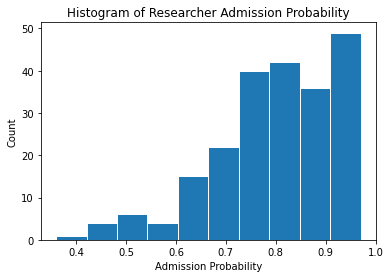

In [4]:
# Plot the researcher admission probabilities
plt.hist(researcher_admit, edgecolor = 'w')
plt.title('Histogram of Researcher Admission Probability')
plt.xlabel('Admission Probability')
plt.ylabel('Count') 
plt.show()

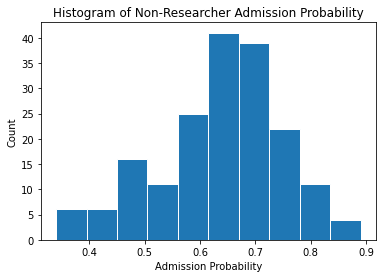

In [5]:
# Plot the non-researcher admission probabilities
plt.hist(non_researcher_admit, edgecolor = 'w')
plt.title('Histogram of Non-Researcher Admission Probability')
plt.xlabel('Admission Probability')
plt.ylabel('Count') 
plt.show()

Based on the graphs shown above, the histogram of researcher admission probability does not look normal at all, it is heaviliy left skewed. For the histogram of non-researcher admission probability, it looks significantly more like a normal distribution. However, just based on the graph, it still appears to be a bit left skewed.

    4. (5pt) Compute the mean difference in the admission rate between researchers and non-researchers.
    Hint: 0.158

In [6]:
mean_difference = np.mean(researcher_admit) - np.mean(non_researcher_admit)
print('The mean difference in the admission rate between reseachers and non-researchers is:')
print(mean_difference)

The mean difference in the admission rate between reseachers and non-researchers is:
0.1583021771487675


    This was the basic description of the data. Now onward to the comparison. We proceed as follows: imagine that there is no real difference in the admission chances for researchers and non- researchers. We call this null-hypothesis H0. Hence whatever difference we see in the actual data is just random sampling noise. We would like to have a huge number of students’ data to test it, but unfortunately we only have what we have. So we do this instead: we create fake researchers’ admission chances, and fake non-researchers’ admission chances, both drawn from the same normal distribution. There must be as many fake ones as there are real ones in the data. Thereafter we compare the mean chances: how much more likely are the fake researchers to be admitted, compared to the fake non-researchers? We repeat this process many times and at the end we report how often did we find a difference that is similar to what we observe in the real data. If this is a common occurrence, we cannot reject H0.

    5. (2pt) Let’s state our H0 again: researchers and non-researchers have similar admission chances (in average). Hence we have to create fake researchers and fake non-researchers using the same distribution. The obvious choice for this is the distribution of all students combined.
    Compute the overall mean μ0 and standard deviation σ0 of admission chances across all students in the data.
    Hint: standard deviation is 0.143.

$H_0$: Researchers and non-researchers have similar admission chances (in average).

$H_1$: Researchers and non-researchers does not have similar admission chances (in average).

In [7]:
# Compute the overall mean and standard deviation
admission_mean = np.mean(admission_df['Chance of Admit'])
print('The overal mean μ_0 is:', admission_mean)
admission_std = np.std(admission_df['Chance of Admit'])
print('The overall standard deviation σ_0 is:', admission_std)

The overal mean μ_0 is: 0.7243499999999996
The overall standard deviation σ_0 is: 0.1424309569580995


    6. (5pt) Now create two sets of random normals, “fake researchers” and “fake non researchers”, both with the same mean μ0 and standard deviation σ0 that you just computed above. The number of fake students must be the same as the number of real students for the corresponding group.
    What is the difference in the mean admission chances of the fake researchers and fake non- researchers? Compare the result with the real difference you found above.
    Hint: say, the average is 0.5 and standard deviation is 0.2. You can create the corresponding normals like:
    faker = np.random.normal(0.5, 0.2, size=5) #create5fakeresearchers
    faken = np.random.normal(0.5, 0.2, size=6) #create6fakenon-researchers
    faker
    ## array([0.85772569, 0.58730197, 0.51929949, 0.12730146, 0.44452236])
    faken
    ## array([0.4290482 , 0.4834517 , 0.37459986, 0.49123637, 0.40455639,
    ## 0.23722705])
    And you can compute the mean difference like this:
    np.mean(faker) - np.mean(faken)
    ## 0.10387693178786389
    Now compare this number with what you see in data.

In [8]:
# Make fake researcher random normals
fake_researcher = np.random.normal(admission_mean, scale = admission_std, size = len(researcher_admit))

# Make fake non researcher random normals
fake_non_researcher = np.random.normal(admission_mean, scale = admission_std, size = len(non_researcher_admit))

# Compute the mean difference between mean difference in the mean admission chances of the fake researchers and fake non-researchers
print("Mean difference between mean admission chances of fake researcher and non-researcher: ", (np.mean(fake_researcher) - np.mean(fake_non_researcher)))

Mean difference between mean admission chances of fake researcher and non-researcher:  -0.03826677556137037


From my fake simulations, I get a mean difference that is very close to 0. The real difference is about 0.158 which is more than I have here.

    7. (3pt) Why do we use the same mean μ0 for both fake researchers and fake non-researchers?

The null hypothesis $H_0$ states that: "There is no difference in admission rates between researchers and non-researchers." In order to test that hypothesis, we must use the same $μ_0$ for both fake researchers and fake non-researchers.

    8. (5pt) Now repeat the previous question a large number R(1000 or more) times. Each time store the mean difference between fake researchers and fake non-researchers, so you end up with Rdifferent values for the mean difference.

In [9]:
# Choose repetitions
R = 1000
# Repeat the previous question with 1000 times and store the mean difference bewteen fake researchers and non-researchers
mean_difference_R = []
for n in range(0, R):
    fake_researcher_trail = np.random.normal(admission_mean, scale = admission_std, size = len(researcher_admit))
    fake_non_esearcher_trail = np.random.normal(admission_mean, scale = admission_std, size = len(non_researcher_admit))
    mean_difference_R.append(np.mean(fake_researcher_trail) - np.mean(fake_non_esearcher_trail))

    9. (5pt) What is the mean of the mean differences? If you did your simulations correctly, it should be close to 0. Explain why do you get this result.

In [10]:
# Compute the mean of the mean differences
print('Mean of the mean differences:', np.mean(mean_difference_R))

Mean of the mean differences: -0.000710066066147221


The result I got was very close to 0. By the central limit theorem, the more samples we have, the closer the mean will be to the expected value, and more normally distributed. Since the null hypothesis states that the difference is 0 (equal chance of admission so 0.5 - 0.5 = 0), the expected value should be close to 0 as well. Thus, it makes sense that with 1000 repetitions, the mean differences would be very close to 0.

    10. (4pt) What is the largest mean difference (in absolute value) in your sample?
    Hint: np.abs computes absolute value.

In [11]:
# Compute the largest mean difference in my sample
print('The largest mean difference is', np.max(np.abs(mean_difference_R)))

The largest mean difference is 0.05779173456651254


    11. (7pt) find 95% confidence interval (CI) of your sample of mean differences based on sample quantiles. Does the difference in actual data, 0.158 in favor of researchers, fall into the CI?
    Hint: use np.percentile(2.5) and a similar expression for the 97.5th percentile.

In [12]:
# Compute the 95% confidence interval of mean differences
lower_bound = np.percentile(mean_difference_R, 2.5)
upper_bound = np.percentile(mean_difference_R, 97.5)

print('The 95% confidence interval is:', '(', lower_bound, ',', upper_bound, ')')

The 95% confidence interval is: ( -0.028513927097509405 , 0.02835681407640858 )


The difference in actual data, 0.158 does not fall into the confidence interval.

    12. (7pt) Finally, based on the simulations, what is your conclusion: is the observed difference 0.158 just a random fluke, or do students with research experience have better admission chances?

Based on the simulations above, the actual value 0.158 did not fall into the confidence interval, we can reject the null hypothesis. We can say that students with research experience have better admission because we know that they do not have equal chances of admission adn we also know researchers have better chance of admission from real data, then we can conclude that students with research experience have better admission chances.

# Now repeat the above with t-test (40pt)

    Above we spent a lot of effort with sampling, random numbers and such. In practice, it is usually not possible to gather data about millions of students. And even if feasible, it is much easier just to do a t-test. Below we ask you to compute the t-value yourself, do not use any pre-existing functions!

    1. (10pt) Compute standard error SEof the nonresearchers-researchers mean difference. Remember: we are still working in logarithms!
    Hint: read OIS 7.3, p 267. You probably have to walk back and read about various other concepts the book is using in 7.3.

In [13]:
# Compute the variance of the researcher and non-researcher admission rate
researcher_var = np.var(researcher_admit)
non_researcher_var = np.var(non_researcher_admit)
# Compute the standard error
standard_error = np.sqrt((researcher_var / len(researcher_admit)) + (non_researcher_var / len(non_researcher_admit)))
print('The standard error of the mean difference is:', standard_error)

The standard error of the mean difference is: 0.011830386868118969


    2. (10pt) Compute 95% CI.
    Use the 5% two-tail significance level to look up tcrvalues in t-distribution table. OIS has such a table in Appendix C.2, and google image search finds a thousand similar tables.
    95% CI is given by μ±tcr·SEwhere μis the mean, SEis its standard error, and tcris the critical value from the table.
    Hint 1: what is the degrees of freedom in current case? Consult OIS 7.3.
    Hint 2: we need 2-tailed test as nonresearchers can have both better and worse admission chances than researchers.
    Hint 3: you can do this in two ways. Compute 95% CI around H0 value (i.e. difference is 0) and check if the actual difference fits in there (this is what we simulated above). Or compute 95% CI around the actual value, and check of H0 value 0 fits in there. DO NOT compute 95% around actual value and then check if the actual value fits in there. It always does!

In [14]:
# Find t value
# Degrees of freedom is 181 - 1 = 180
t_val = 1.97
# Compute the 95% confidence interval around H0 value (i.e. difference is 0)
t_lower = 0 - t_val * standard_error
t_upper = 0 + t_val * standard_error
print('The 95% confidence interval is:', '(', t_lower, ',', t_upper, ')')

The 95% confidence interval is: ( -0.02330586213019437 , 0.02330586213019437 )


    3. (6pt) What will you conclude based on CI: can you reject H0 that nonresearchers and re- searchers have equal admission chance at 5% level?

Based on the confidence interval, the actual difference 0.158 does not fall within the confidence interval and thus we can reject the null hypothesis $H_0$ that non researchers and researchers have euqal admission probability at 5% level.

    4. (8pt) Now perform the opposite operation: compute the t-value. When the you have mean μ and standard error SE, you can compute the t-value by t = μ / SE
    Hint: the answer is 13.38.

In [15]:
# Compute the t-value
t = mean_difference / standard_error
print('T value is:', t)

T value is: 13.380980597969026


    5. (6pt) What is the likelihood that such a tvalue happens just by random chance? Consult the t-table. 
    Hint: I have never seen t-tables that contain such large values. But where on the table would you write this value? What can you say about how likely it is to see such a value just by random chance?

There is no table that has a t value that is about 13.381. However, I would follow the pattern that if this is for the same degree of freedom, the two tail percentage have to be almost 0 in order to get a t value near 13.381, which means that this t value is an unlikely event and happened by random chance.

# Use canned t-test function (10pt)

    Finally, we use a ready-made library: scipy.stats.ttest_ind contains ready-made t-test function.

    1. (5pt) Compute t-value and the probability using ttest_ind.
    Note: you have to specify equal_var=False to tell the function that non-researchers and researchers chances may have different variance.

In [16]:
# Compute t value and probability using ttest_ind
print("Test results: ")
print(ttest_ind(researcher_admit, non_researcher_admit, equal_var = False))

Test results: 
Ttest_indResult(statistic=13.347126182410907, pvalue=8.966853051858437e-34)


    2. (5pt) Finally, state your conclusion: do researchers have better admission chances than non-researchers?
    Do all of your three methods: simulations, 95% CI, t-value and python’s t-test agree?
    Hint: they should!

Conclusion: Researchers have better admission chances than non-researchers.

As seen in the conclusions for simulations and 95% CIs, because 0.158 did not fall into the 95% confidence interval, we reject the null hypothesis that researchers and non-researchers have the same admission chance. For the t value, the t value I computed almost matches with the t value python's function computed (This is probably because of the use of np.var and np.sqrt that caused rounding problems). The python's t-test agree with my previous two tests, since the p value is so much smaller than 0.05, we can also reject the null hypothesis. Because we also know that researchers from the real data has better chance of admission, we can conclude that researchers have better admission chances than non-researchers.